# NLP: Classifying Product Reviews by Sentiment

* Name: Gustavo Alejandro Chavez
* Cohort Lead: Abinheet Kulkarni
* Project: Phase 04 Project-- NLP


# Imports

In [11]:
import pandas as pd
import numpy as np
import os
import string
import pickle
import sklearn

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, plot_roc_curve
from sklearn.preprocessing import label_binarize

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\Gustavo\\flatiron\\class-material\\section04\\Phase04Project\\Notebooks'

In [3]:

if os.getcwd() == '/content':
    from google.colab import drive
    drive.mount('/content/drive')

In [4]:
#Importing in data
if os.getcwd() == '/content':
  #X
  with open('/content/drive/My Drive/Colab Notebooks/Phase04Project/Data/SVD_train_data.txt', 'rb') as fp:
    X_train = pickle.load(fp)
  with open('/content/drive/My Drive/Colab Notebooks/Phase04Project/Data/SVD_test_data.txt', 'rb') as fp:
    X_test = pickle.load(fp)
  
  #y
  with open('/content/drive/My Drive/Colab Notebooks/Phase04Project/Data/target_train_data.txt', 'rb') as fp:
    y_train = pickle.load(fp)
  with open('/content/drive/My Drive/Colab Notebooks/Phase04Project/Data/target_test_data.txt', 'rb') as fp:
    y_test = pickle.load(fp)
    
  #X but bigrams
  with open('/content/drive/My Drive/Colab Notebooks/Phase04Project/Data/Bigram_train_data.txt', 'rb') as fp:
    bigram_X_train = pickle.load(fp)
  with open('/content/drive/My Drive/Colab Notebooks/Phase04Project/Data/Bigram_test_data.txt', 'rb') as fp:
    bigram_X_test = pickle.load(fp)
    
else:
    #X
    with open('../Data/SVD_train_data.txt', 'rb') as fp:
        X_train = pickle.load(fp)
    with open('../Data/SVD_test_data.txt', 'rb') as fp:
        X_test = pickle.load(fp)
  
  #y
    with open('../Data/target_train_data.txt', 'rb') as fp:
        y_train = pickle.load(fp)
    with open('../Data/target_test_data.txt', 'rb') as fp:
        y_test = pickle.load(fp)
    
  #X but bigrams
    with open('../Data/Bigram_train_data.txt', 'rb') as fp:
        bigram_X_train = pickle.load(fp)
    with open('../Data/Bigram_test_data.txt', 'rb') as fp:
        bigram_X_test = pickle.load(fp)

# Model Selection and Training

## Standard training and test data

In [5]:
classifiers = [XGBClassifier(), RandomForestClassifier(n_estimators=100), LogisticRegressionCV(cv =5), SVC()]

In [6]:
def get_report(classifier, X_train, y_train, X_test, y_test):
  classifier.fit(X_train, y_train)
  print(f"{classifier}")
  print("--Training Data--")
  display(confusion_matrix(y_train, classifier.predict(X_train)))
  print("\n"+ classification_report(y_train, classifier.predict(X_train)))
  print("--Test--")
  display(confusion_matrix(y_test, classifier.predict(X_test)))
  print("\n"+ classification_report(y_test, classifier.predict(X_test)))
  return

In [7]:
#Printing a base model for each one to see where each model is at with this data
for classifier in classifiers:
  get_report(classifier=classifier, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

XGBClassifier(objective='multi:softprob')
--Training Data--


array([[ 195,   34,  182],
       [   1, 3975,   56],
       [   0,  221, 2038]], dtype=int64)


              precision    recall  f1-score   support

           0       0.99      0.47      0.64       411
           1       0.94      0.99      0.96      4032
           2       0.90      0.90      0.90      2259

    accuracy                           0.93      6702
   macro avg       0.94      0.79      0.83      6702
weighted avg       0.93      0.93      0.92      6702

--Test--


array([[   7,   14,  138],
       [   0, 1330,   26],
       [   2,   80,  637]], dtype=int64)


              precision    recall  f1-score   support

           0       0.78      0.04      0.08       159
           1       0.93      0.98      0.96      1356
           2       0.80      0.89      0.84       719

    accuracy                           0.88      2234
   macro avg       0.84      0.64      0.63      2234
weighted avg       0.88      0.88      0.86      2234

RandomForestClassifier()
--Training Data--


array([[ 408,    1,    2],
       [   1, 4030,    1],
       [   0,   10, 2249]], dtype=int64)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       411
           1       1.00      1.00      1.00      4032
           2       1.00      1.00      1.00      2259

    accuracy                           1.00      6702
   macro avg       1.00      1.00      1.00      6702
weighted avg       1.00      1.00      1.00      6702

--Test--


array([[  22,   74,   63],
       [   8, 1277,   71],
       [   1,  302,  416]], dtype=int64)


              precision    recall  f1-score   support

           0       0.71      0.14      0.23       159
           1       0.77      0.94      0.85      1356
           2       0.76      0.58      0.66       719

    accuracy                           0.77      2234
   macro avg       0.75      0.55      0.58      2234
weighted avg       0.76      0.77      0.74      2234



C:\Users\Gustavo\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Gustavo\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

LogisticRegressionCV(cv=5)
--Training Data--


array([[ 305,   38,   68],
       [   5, 3971,   56],
       [   1,  214, 2044]], dtype=int64)


              precision    recall  f1-score   support

           0       0.98      0.74      0.84       411
           1       0.94      0.98      0.96      4032
           2       0.94      0.90      0.92      2259

    accuracy                           0.94      6702
   macro avg       0.95      0.88      0.91      6702
weighted avg       0.94      0.94      0.94      6702

--Test--


array([[  49,   13,   97],
       [   4, 1329,   23],
       [  10,   80,  629]], dtype=int64)


              precision    recall  f1-score   support

           0       0.78      0.31      0.44       159
           1       0.93      0.98      0.96      1356
           2       0.84      0.87      0.86       719

    accuracy                           0.90      2234
   macro avg       0.85      0.72      0.75      2234
weighted avg       0.89      0.90      0.89      2234

SVC()
--Training Data--


array([[ 163,   38,  210],
       [   4, 3969,   59],
       [   1,  222, 2036]], dtype=int64)


              precision    recall  f1-score   support

           0       0.97      0.40      0.56       411
           1       0.94      0.98      0.96      4032
           2       0.88      0.90      0.89      2259

    accuracy                           0.92      6702
   macro avg       0.93      0.76      0.81      6702
weighted avg       0.92      0.92      0.91      6702

--Test--


array([[  15,   13,  131],
       [   1, 1330,   25],
       [   0,   80,  639]], dtype=int64)


              precision    recall  f1-score   support

           0       0.94      0.09      0.17       159
           1       0.93      0.98      0.96      1356
           2       0.80      0.89      0.84       719

    accuracy                           0.89      2234
   macro avg       0.89      0.65      0.66      2234
weighted avg       0.89      0.89      0.86      2234



In [8]:
#Creating function that will build a roc curve for each of our base models
def get_roc_curve(clf, X, y_bin, axis=None, title=None):
    
    #Initiates a y-score
    y_score = 0
    
    #This block determines how to proceed depending on whether we have a logistic/ svm model vs the others
    if ((type(clf) == sklearn.linear_model._logistic.LogisticRegressionCV) | (type(clf) == sklearn.svm._classes.SVC)):
        y_score = clf.decision_function(X)
    else:
        y_score = clf.predict_proba(X)
        
    #Calculates the values for our roc curve
    fpr = {}
    tpr = {}
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    #Establishes our axes/ creates our plots
    if axis:
        for i in range(3):
            axis.plot(fpr[i], tpr[i], label=str(i))
        axis.legend()
        axis.set_xlabel('FPR')
        axis.set_ylabel('TPR')
        axis.set_title(title)
        
    else:
        plt.plot(figsize=(10,10))
        for i in range(3): 
            plt.plot(fpr[i], tpr[i], label=str(i))
        plt.legend()
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title(title)
    

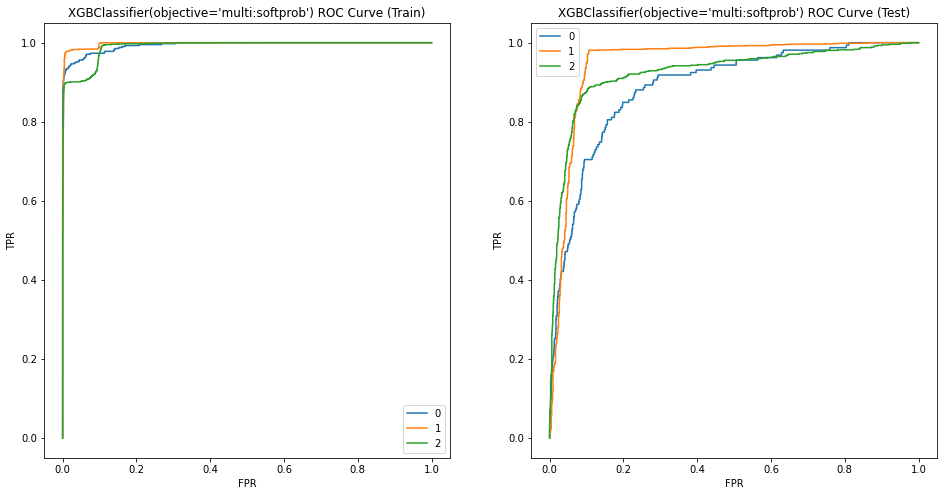

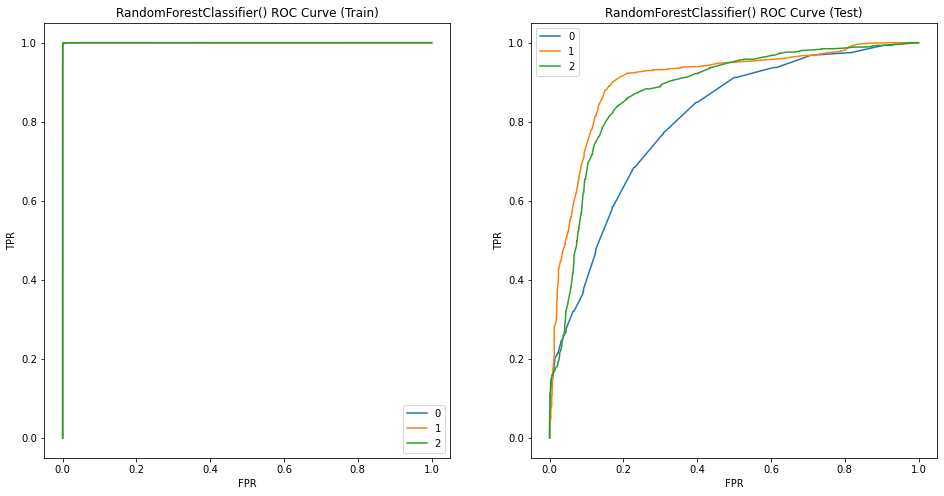

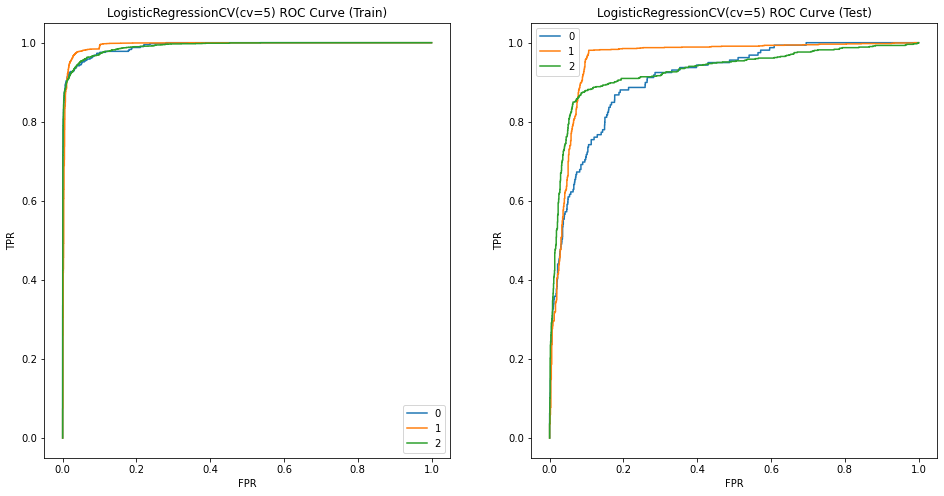

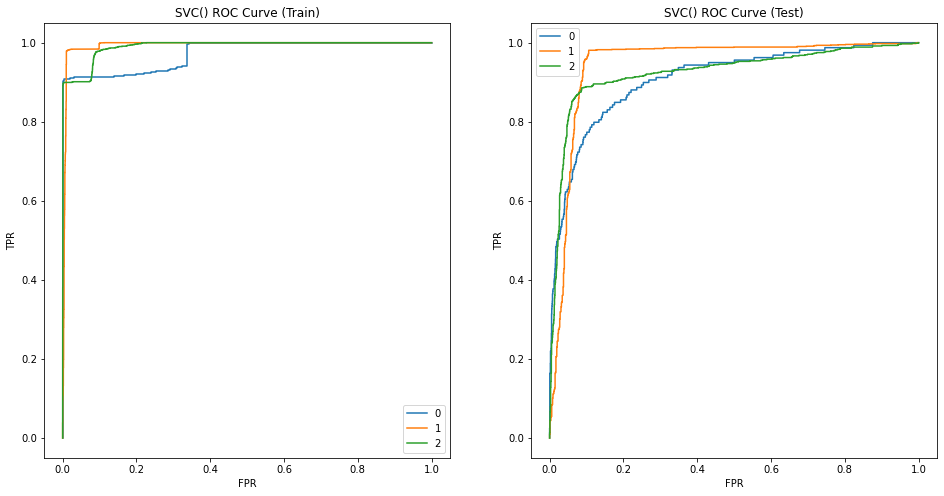

In [12]:
#label binarizing for roc curve
y_train_bin = label_binarize(y_train, classes=[0,1,2])
y_test_bin = label_binarize(y_test, classes=[0,1,2])

#Creating roc curve graphs
for classifier in classifiers:
    fig, axes = plt.subplots(1,2, figsize=(16,8))
    get_roc_curve(classifier, X_train, y_train_bin, axis=axes[0], title=f'{classifier} ROC Curve (Train)')
    get_roc_curve(classifier, X_test, y_test_bin, axis=axes[1], title=f'{classifier} ROC Curve (Test)')

In the dataset there is a huge issue of class imbalance. There are significantly more neutral reviews than there are reviews with an attached emotion, and of the reviews with emotion, there are significantly more positive reviews than there are negative. Of the models I have chosen, most have performed exceptionally well, however a few have overfit onto the training data, such as the RandomForest model. This is made apparent as well when you look at the ROC curves of our data. Of all the classes, the classifiers have an easier time detecting that there is no emotion present, and on the test data, and struggle the most to identify tweets of negative sentiment. Perhaps later on in SMOTE-ing the data, We can better classify the negative emotion tweets.

## Bigram train and test data

In [ ]:
for classifier in classifiers:
  get_report(classifier=classifier, X_train=bigram_X_train, y_train=y_train, X_test=bigram_X_test, y_test=y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
--Training Data--


array([[ 100,   37,  274],
       [   0, 3974,   58],
       [   0,  217, 2042]])


              precision    recall  f1-score   support

           0       1.00      0.24      0.39       411
           1       0.94      0.99      0.96      4032
           2       0.86      0.90      0.88      2259

    accuracy                           0.91      6702
   macro avg       0.93      0.71      0.75      6702
weighted avg       0.92      0.91      0.90      6702

--Test--


array([[   3,   13,  143],
       [   0, 1330,   26],
       [   0,   80,  639]])


              precision    recall  f1-score   support

           0       1.00      0.02      0.04       159
           1       0.93      0.98      0.96      1356
           2       0.79      0.89      0.84       719

    accuracy                           0.88      2234
   macro avg       0.91      0.63      0.61      2234
weighted avg       0.89      0.88      0.85      2234

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
--Training Data--


array([[ 408,    2,    1],
       [   0, 4031,    1],
       [   1,    9, 2249]])


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       411
           1       1.00      1.00      1.00      4032
           2       1.00      1.00      1.00      2259

    accuracy                           1.00      6702
   macro avg       1.00      1.00      1.00      6702
weighted avg       1.00      1.00      1.00      6702

--Test--


array([[  19,  112,   28],
       [   6, 1291,   59],
       [  11,  443,  265]])


              precision    recall  f1-score   support

           0       0.53      0.12      0.19       159
           1       0.70      0.95      0.81      1356
           2       0.75      0.37      0.49       719

    accuracy                           0.71      2234
   macro avg       0.66      0.48      0.50      2234
weighted avg       0.70      0.71      0.66      2234



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)
--Training Data--


array([[ 354,   38,   19],
       [   8, 3969,   55],
       [   1,  221, 2037]])


              precision    recall  f1-score   support

           0       0.98      0.86      0.91       411
           1       0.94      0.98      0.96      4032
           2       0.96      0.90      0.93      2259

    accuracy                           0.95      6702
   macro avg       0.96      0.92      0.94      6702
weighted avg       0.95      0.95      0.95      6702

--Test--


array([[  33,   13,  113],
       [   1, 1330,   25],
       [   1,   80,  638]])


              precision    recall  f1-score   support

           0       0.94      0.21      0.34       159
           1       0.93      0.98      0.96      1356
           2       0.82      0.89      0.85       719

    accuracy                           0.90      2234
   macro avg       0.90      0.69      0.72      2234
weighted avg       0.90      0.90      0.88      2234

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
--Training Data--


array([[ 103,   38,  270],
       [   4, 3969,   59],
       [   1,  222, 2036]])


              precision    recall  f1-score   support

           0       0.95      0.25      0.40       411
           1       0.94      0.98      0.96      4032
           2       0.86      0.90      0.88      2259

    accuracy                           0.91      6702
   macro avg       0.92      0.71      0.75      6702
weighted avg       0.91      0.91      0.90      6702

--Test--


array([[  11,   13,  135],
       [   1, 1330,   25],
       [   0,   80,  639]])


              precision    recall  f1-score   support

           0       0.92      0.07      0.13       159
           1       0.93      0.98      0.96      1356
           2       0.80      0.89      0.84       719

    accuracy                           0.89      2234
   macro avg       0.88      0.65      0.64      2234
weighted avg       0.89      0.89      0.86      2234



I will be using the f-1 score for the minority class (negative reviews) to drive my decision making. It is important to capture most of the negative reviews since those could offer insight to possible problems, and it is equally important to know the negative things people are saying as much as it is pleasant to hear the positive things. The dataset composed of bigrams had worse f-1 scores across the board on the test data than the data without. Moving forward, we will only use the unigram data.

## Dealing with Class Imbalance using SMOTE

There are many ways of dealing with class imbalance. because the size of negative reviews is very small and I do not wish to lose data, I will not be undersampling. My data as it stands is overfit onto the training data thus I will not be using oversampling either since models tend to overfit when it is used. While SMOTE works well with low dimensional data but is less effective with high dimensional data, such as text data. I will still be implementing it in hopes of improvement.

In [13]:
#Will not smote test data, thus I am okay naming these just smote_X and smote_y
smote =SMOTE(random_state=42)
smote_X, smote_y = smote.fit_resample(X_train, y_train)

C:\Users\Gustavo\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Gustavo\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [14]:
print(smote_X.shape)
print(smote_y.shape)

(12096, 3632)
(12096,)


In [15]:
for classifier in classifiers:
  get_report(classifier, smote_X, smote_y, X_test, y_test)

XGBClassifier(objective='multi:softprob')
--Training Data--


array([[3898,   99,   35],
       [  20, 3968,   44],
       [ 174,  378, 3480]], dtype=int64)


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4032
           1       0.89      0.98      0.94      4032
           2       0.98      0.86      0.92      4032

    accuracy                           0.94     12096
   macro avg       0.94      0.94      0.94     12096
weighted avg       0.94      0.94      0.94     12096

--Test--


array([[  87,   13,   59],
       [   7, 1330,   19],
       [  87,   80,  552]], dtype=int64)


              precision    recall  f1-score   support

           0       0.48      0.55      0.51       159
           1       0.93      0.98      0.96      1356
           2       0.88      0.77      0.82       719

    accuracy                           0.88      2234
   macro avg       0.76      0.77      0.76      2234
weighted avg       0.88      0.88      0.88      2234

RandomForestClassifier()
--Training Data--


array([[4030,    0,    2],
       [   2, 4024,    6],
       [   0,    6, 4026]], dtype=int64)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4032
           1       1.00      1.00      1.00      4032
           2       1.00      1.00      1.00      4032

    accuracy                           1.00     12096
   macro avg       1.00      1.00      1.00     12096
weighted avg       1.00      1.00      1.00     12096

--Test--


array([[  34,   43,   82],
       [  13, 1250,   93],
       [  11,  186,  522]], dtype=int64)


              precision    recall  f1-score   support

           0       0.59      0.21      0.31       159
           1       0.85      0.92      0.88      1356
           2       0.75      0.73      0.74       719

    accuracy                           0.81      2234
   macro avg       0.73      0.62      0.64      2234
weighted avg       0.80      0.81      0.79      2234



C:\Users\Gustavo\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Gustavo\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

LogisticRegressionCV(cv=5)
--Training Data--


C:\Users\Gustavo\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[4029,    0,    3],
       [  12, 3985,   35],
       [   5,   54, 3973]], dtype=int64)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4032
           1       0.99      0.99      0.99      4032
           2       0.99      0.99      0.99      4032

    accuracy                           0.99     12096
   macro avg       0.99      0.99      0.99     12096
weighted avg       0.99      0.99      0.99     12096

--Test--


array([[  81,   15,   63],
       [  13, 1301,   42],
       [  44,   75,  600]], dtype=int64)


              precision    recall  f1-score   support

           0       0.59      0.51      0.55       159
           1       0.94      0.96      0.95      1356
           2       0.85      0.83      0.84       719

    accuracy                           0.89      2234
   macro avg       0.79      0.77      0.78      2234
weighted avg       0.88      0.89      0.88      2234

SVC()
--Training Data--


array([[4026,    0,    6],
       [  24, 3952,   56],
       [   6,  168, 3858]], dtype=int64)


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4032
           1       0.96      0.98      0.97      4032
           2       0.98      0.96      0.97      4032

    accuracy                           0.98     12096
   macro avg       0.98      0.98      0.98     12096
weighted avg       0.98      0.98      0.98     12096

--Test--


array([[  63,   12,   84],
       [   7, 1275,   74],
       [   9,   78,  632]], dtype=int64)


              precision    recall  f1-score   support

           0       0.80      0.40      0.53       159
           1       0.93      0.94      0.94      1356
           2       0.80      0.88      0.84       719

    accuracy                           0.88      2234
   macro avg       0.84      0.74      0.77      2234
weighted avg       0.88      0.88      0.88      2234



Okay, there is a significant level of improvement in our macro f-1 scores for the test set for the classifiers that have been fit with the smoted data. I will now use GridSearchCV to optimize each on on macro f-1 scores

## Tuning Logistic Regression Model

In [16]:
logreg_clf = LogisticRegressionCV(cv=3)
param_grid = {'Cs':[15, 18, 20, 22]}

gridsearch_logreg = GridSearchCV(logreg_clf, param_grid=param_grid, scoring= 'f1_macro',cv=3)
gridsearch_logreg.fit(smote_X, smote_y)

C:\Users\Gustavo\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Gustavo\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Gustavo\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=3, estimator=LogisticRegressionCV(cv=3),
             param_grid={'Cs': [20]}, scoring='f1_macro')

In [17]:
gridsearch_logreg.best_params_

{'Cs': 20}

In [18]:
logreg_clf = LogisticRegressionCV(Cs=20 ,cv=3)

In [19]:
get_report(logreg_clf, smote_X, smote_y, X_test, y_test)

C:\Users\Gustavo\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Gustavo\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

LogisticRegressionCV(Cs=20, cv=3)
--Training Data--


C:\Users\Gustavo\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[4028,    0,    4],
       [  12, 3985,   35],
       [   5,   47, 3980]], dtype=int64)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4032
           1       0.99      0.99      0.99      4032
           2       0.99      0.99      0.99      4032

    accuracy                           0.99     12096
   macro avg       0.99      0.99      0.99     12096
weighted avg       0.99      0.99      0.99     12096

--Test--


array([[  80,   15,   64],
       [  14, 1300,   42],
       [  44,   76,  599]], dtype=int64)


              precision    recall  f1-score   support

           0       0.58      0.50      0.54       159
           1       0.93      0.96      0.95      1356
           2       0.85      0.83      0.84       719

    accuracy                           0.89      2234
   macro avg       0.79      0.76      0.78      2234
weighted avg       0.88      0.89      0.88      2234



There was an increase from 0.75 -> 0.77 from our first initial assessment using Logistic Regression to after we have tuned it using GridSearchCV. The Logistic Regression Model performed pretty well since the first iteration. I will now look at the other models who had different levels of performance

## Tuning SVM Model

In [22]:
svm_clf = SVC()
param_grid = {'C':[0.5, 1, 5, 10], 'kernel': ['rbf']}
gridsearch_svm = GridSearchCV(svm_clf,param_grid=param_grid, scoring='f1_macro', cv=3)
gridsearch_svm.fit(smote_X, smote_y)

GridSearchCV(cv=3, estimator=SVC(), param_grid={'C': [0.5], 'kernel': ['rbf']},
             scoring='f1_macro')

In [23]:
gridsearch_svm.best_params_

{'C': 0.5, 'kernel': 'rbf'}

In [ ]:
svm_clf = SVC(C= .5, kernel= 'rbf')
get_report(svm_clf, smote_X, smote_y, X_test, y_test)


SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
--Training Data--


array([[4016,    6,   10],
       [  23, 3952,   57],
       [   7,  330, 3695]])


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4032
           1       0.92      0.98      0.95      4032
           2       0.98      0.92      0.95      4032

    accuracy                           0.96     12096
   macro avg       0.97      0.96      0.96     12096
weighted avg       0.97      0.96      0.96     12096

--Test--


array([[  65,   13,   81],
       [   7, 1328,   21],
       [  15,   80,  624]])


              precision    recall  f1-score   support

           0       0.75      0.41      0.53       159
           1       0.93      0.98      0.96      1356
           2       0.86      0.87      0.86       719

    accuracy                           0.90      2234
   macro avg       0.85      0.75      0.78      2234
weighted avg       0.90      0.90      0.90      2234



With C=10 what we had happen is the model then overfit on the training data. Since we had a decrease in test macro f1, I can it again with a lower C. Even with a C of 5, it was not better than baseline. With a C of 0.5 however, we get a smaller difference in accuracy scores between training and test, as well as a higher macro_f1, so I'll take it.

## Tuning Random Forest Model

Random Forest and XGBoosting will require a different approach to tuning than the previous two models. This is because the Random Forest model is the most overfit to the training data than any other model, showing a near 100% accuracy on the training data, yet significantly lower accuracy on the test data while having a poor macro f-1 score. before SMOTE, macro f-1 score was 0.59. After SMOTE-ing the data there was an increase in macro f-1 to 0.63 which is better, but that was on the test data. GridSearch will not work here because even if I score on f-1, the overfit model has perfect scores in all categories to begin with, thus any model that sacrifices accuracy and f-1 score on the training data for better results on the test data will not be shown as the best params for the Random Forest model.

In [24]:
rf_clf = RandomForestClassifier(max_depth=8, n_estimators=150, min_samples_split=5)
get_report(rf_clf, smote_X, smote_y, X_test, y_test)

RandomForestClassifier(max_depth=8, min_samples_split=5, n_estimators=150)
--Training Data--


array([[3993,   25,   14],
       [  27, 3983,   22],
       [  23,  160, 3849]], dtype=int64)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4032
           1       0.96      0.99      0.97      4032
           2       0.99      0.95      0.97      4032

    accuracy                           0.98     12096
   macro avg       0.98      0.98      0.98     12096
weighted avg       0.98      0.98      0.98     12096

--Test--


array([[  73,   18,   68],
       [  17, 1290,   49],
       [  64,  118,  537]], dtype=int64)


              precision    recall  f1-score   support

           0       0.47      0.46      0.47       159
           1       0.90      0.95      0.93      1356
           2       0.82      0.75      0.78       719

    accuracy                           0.85      2234
   macro avg       0.73      0.72      0.73      2234
weighted avg       0.85      0.85      0.85      2234



After tuning max depth, n-estimators, and min samples split manually, this is the improvement in model that I've gotten. From baseline Random Forest f-1 score of 0.63 and accuracy of 0.80, we are now at an f-1 score of 0.73 and accuracy of 0.85. pretty good improvement!

## Tuning XGBooster

Due to overfit nature of XGBooster, we will be taking the same approach as we did with random forests to find optimal parameters

In [25]:
xgb_clf = XGBClassifier(max_depth=4, learning_rate= 0.2, n_estimators=100, gamma= 0.1)
get_report(xgb_clf, smote_X, smote_y, X_test, y_test)

XGBClassifier(gamma=0.1, learning_rate=0.2, max_depth=4,
              objective='multi:softprob')
--Training Data--


array([[4031,    0,    1],
       [   2, 4027,    3],
       [   4,   23, 4005]], dtype=int64)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4032
           1       0.99      1.00      1.00      4032
           2       1.00      0.99      1.00      4032

    accuracy                           1.00     12096
   macro avg       1.00      1.00      1.00     12096
weighted avg       1.00      1.00      1.00     12096

--Test--


array([[  64,   15,   80],
       [   6, 1318,   32],
       [  29,   80,  610]], dtype=int64)


              precision    recall  f1-score   support

           0       0.65      0.40      0.50       159
           1       0.93      0.97      0.95      1356
           2       0.84      0.85      0.85       719

    accuracy                           0.89      2234
   macro avg       0.81      0.74      0.76      2234
weighted avg       0.88      0.89      0.89      2234



XGBClassifier experienced the largest change in recall of the minority class between pre- and post- SMOTE, with a change of 0.08 recall to 0.47. For the f1 score that we are using as our guide, it increased from 0.63 to 0.75. My final scores for the XGBClassifier was an f1 score of 0.75 and an accuracy of 89%, which means I did improve accuracy from the base classifier.

# Conclusion

|Classifier| Initial Macro F1 Score | Final Macro F1 Score|Initial Accuracy |Final Accuracy|
|:---:| :---:| :---:| :---: |:---:|
|RandomForestClassifier| 0.59| 0.73|0.78| 0.85|
|XGBClassifier| 0.63| 0.75|0.88| 0.89|
|LogisticRegressionCV| 0.75 |0.77 |0.90| 0.89|
|SVC| 0.66|0.78|0.89|0.90|



For all models, we had an improvement in the macro f1 score, which is good! It means my classifiers were able to better classify the minority classes. Random Forest was the model that most benefitted from tuning and SMOTE. The Support Vector Machines model had the best scores in terms of macro f1 scores and accuracy and thus my best functioning model although all models are fairly strong here.